In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import  mean_absolute_error,mean_squared_error, r2_score

In [15]:
df = pd.read_csv('aws.csv', encoding='ISO-8859-1')
df

,DATE,TIME(UTC),RAIN_HOURLY(mm),RAIN_DAILY(mm),TEMP(C),TEMP_MIN(C),TEMP_MAX(C),TEMP_MIN_MAX_DAY(C),DEW_POINT(C),RH(%),...,SOIL_TEMP_10cm(C),SOIL_MOIS_10cm(m3/m3),SOIL_TEMP_30cm(C),SOIL_MOIS_30cm(m3/m3),SOIL_TEMP_70cm(C),SOIL_MOIS_70cm(m3/m3),SOIL_TEMP_100cm(C),SOIL_MOIS_100cm(m3/m3),GLOBAL_RADIATION(v/m2),PAR(micro-mole/m2s)
0,2020-01-01,0:00:00,0.0,0.0,0.5,0.0,1.2,NaN,-3.6,74.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-01,0:15:00,0.0,0.0,0.8,0.0,1.7,NaN,-3.3,74.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-01,0:30:00,0.0,0.0,1.0,0.0,1.7,NaN,-3.1,74.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-01,0:45:00,0.0,0.0,1.3,1.2,1.3,NaN,-2.7,75.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-01,1:00:00,0.0,0.0,1.5,1.2,1.7,NaN,-2.8,73.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150778,2024-12-31,22:45:00,0.0,0.0,4.1,3.7,4.1,NaN,4.1,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150779,2024-12-31,23:00:00,0.0,0.0,3.4,3.2,4.2,NaN,3.4,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150780,2024-12-31,23:15:00,0.0,0.0,2.5,2.4,4.2,NaN,2.5,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150781,2024-12-31,23:30:00,0.0,0.0,2.5,2.4,4.2,NaN,2.5,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Epoch 1/20


C:\Users\karan\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3770/3770 ━━━━━━━━━━━━━━━━━━━━ 50s 12ms/step - loss: 5.0051e-05 - val_loss: 2.6653e-06
Epoch 2/20
3770/3770 ━━━━━━━━━━━━━━━━━━━━ 45s 12ms/step - loss: 6.9766e-05 - val_loss: 2.1112e-06
Epoch 3/20
3770/3770 ━━━━━━━━━━━━━━━━━━━━ 83s 12ms/step - loss: 6.1240e-05 - val_loss: 1.9624e-06
Epoch 4/20
3770/3770 ━━━━━━━━━━━━━━━━━━━━ 46s 12ms/step - loss: 6.3565e-05 - val_loss: 2.1403e-06
Epoch 5/20
3770/3770 ━━━━━━━━━━━━━━━━━━━━ 46s 12ms/step - loss: 5.3021e-05 - val_loss: 5.4125e-06
Epoch 6/20
3770/3770 ━━━━━━━━━━━━━━━━━━━━ 46s 12ms/step - loss: 4.6735e-05 - val_loss: 1.9392e-06
Epoch 7/20
3770/3770 ━━━━━━━━━━━━━━━━━━━━ 82s 12ms/step - loss: 6.8303e-05 - val_loss: 2.6228e-06
Epoch 8/20
3770/3770 ━━━━━━━━━━━━━━━━━━━━ 45s 12ms/step - loss: 4.2933e-05 - val_loss: 2.5622e-06
Epoch 9/20
3770/3770 ━━━━━━━━━━━━━━━━━━━━ 43s 11ms/step - loss: 4.1873e-05 - val_loss: 2.1903e-06
Epoch 10/20
3770/3770 ━━━━━━━━━━━━━━━━━━━━ 43s 11ms/step - loss: 4.8599e-05 - val_loss: 2.1738e-06
Epoch 11/20
3770/3770 ━━━━━━━━

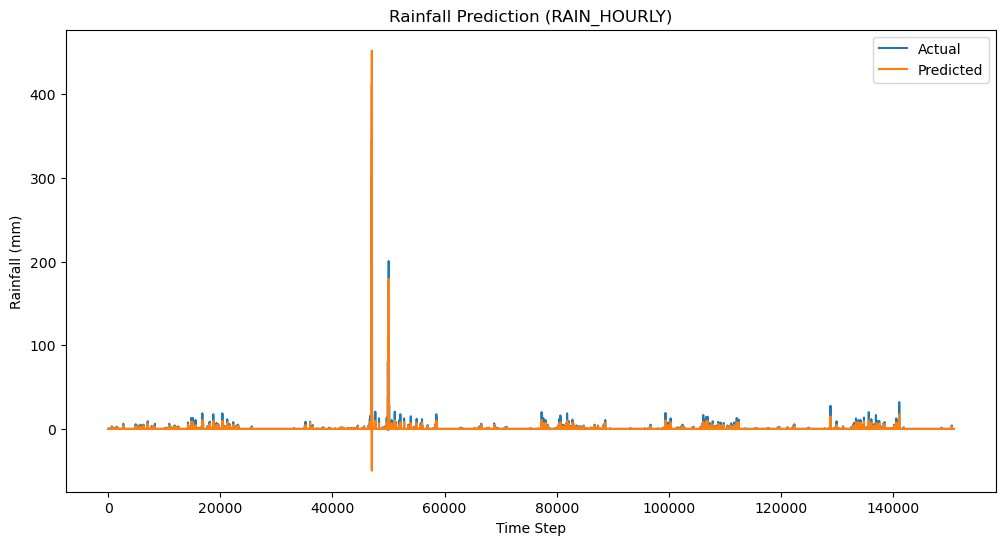

In [17]:
df['DATETIME'] = pd.to_datetime(df['DATE'] + ' ' + df['TIME(UTC)'])
df = df.sort_values('DATETIME').reset_index(drop=True)

# Extract the target column and fill NaNs
rainfall = df['RAIN_HOURLY(mm)'].fillna(0).values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler()
rainfall_scaled = scaler.fit_transform(rainfall)

# Create sequences
def create_sequences(data, time_steps=10):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

time_steps = 10
X, y = create_sequences(rainfall_scaled, time_steps)
model = Sequential([
    LSTM(64, activation='relu', input_shape=(X.shape[1], X.shape[2])),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
history = model.fit(X, y, epochs=20, batch_size=32, validation_split=0.2)
# Predict
predictions = model.predict(X)
predictions = scaler.inverse_transform(predictions)
actual = scaler.inverse_transform(y)

# Plot actual vs predicted
plt.figure(figsize=(12,6))
plt.plot(actual, label='Actual')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.title('Rainfall Prediction (RAIN_HOURLY)')
plt.xlabel('Time Step')
plt.ylabel('Rainfall (mm)')
plt.show()


In [33]:
mae = mean_absolute_error(actual,predictions)
mse = mean_squared_error(actual, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(actual,predictions)
print("evaluation metrics:")
print(f"MAE : {mae:.3f}")
print(f"MSE : {mse:.3f}")
print(f"RMSE : {rmse:.3f}")
print(f"R^2 : {r2:.3f}")


evaluation metrics:
MAE : 0.203
MSE : 3.529
RMSE : 1.879
R^2 : 0.536
